In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [660]:
sheet_0 = pd.read_excel('Comp_Invest_Dataset.xlsx', 'COMPANY')
sheet_1 = pd.read_excel('Comp_Invest_Dataset.xlsx', 'INVESTMENT')
sheet_2 = pd.read_excel('Comp_Invest_Dataset.xlsx', 'ACQUISITION')
sheet_3 = pd.read_excel('Comp_Invest_Dataset.xlsx', 'EMPLOYEE')

## Data cleaning sheet 0

In [661]:
# On regarde ce que contient cette page
sheet_0.head(5)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States","Mar 21, 2006","Nov 7, 2013",—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",Oct 2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China","Apr 4, 2010","Jul 9, 2018",—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


In [662]:
# On vérifie s'il y a des nuls
sheet_0.isnull().sum()

COMPANY_NAME       0
CATEGORY           0
LOCATION           0
FOUNDED_ON         0
EXITED_ON          0
CLOSED_ON          0
REVENU_RANGE       0
EMPLOYEE_NUMBER    0
dtype: int64

In [663]:
# On vérifie s'il y a des lignes dupliquées
sheet_0.duplicated().sum()

np.int64(0)

In [664]:
# La regular expression permet d'extraire seulement l'année (grace à d{4] qui veut dire 4 digits)
sheet_0["FOUNDED_ON"] = sheet_0["FOUNDED_ON"].str.extract(r'(\b\d{4}\b)')
sheet_0.EXITED_ON = sheet_0.EXITED_ON.str.extract(r'(\b\d{4}\b)')
sheet_0.fillna('—', inplace=True) #Inplace permet de remplacer directement dans le dataframe et de ne pas en recréer un

In [665]:
sheet_0.head(5)

,COMPANY_NAME,CATEGORY,LOCATION,FOUNDED_ON,EXITED_ON,CLOSED_ON,REVENU_RANGE,EMPLOYEE_NUMBER
0,Twitter,"Blogging Platforms, Messaging, SMS, Social Media","San Francisco, California, United States",2006,2013,—,$1B to $10B,1001-5000
1,Ant Group,"Banking, E-Commerce, Financial Services, FinTe...","Hangzhou, Zhejiang, China",2014,—,—,$100M to $500M,5001-10000
2,Squire,"Consumer, FinTech, Mobile Apps, Point of Sale,...","New York, New York, United States",2016,—,—,$1M to $10M,51-100
3,Xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",2010,2018,—,$10B+,10001+
4,maude,"Consumer Goods, E-Commerce, Personal Health, W...","Brooklyn, New York, United States",2018,—,—,$1M to $10M,1-10


## Data cleaning sheet 1

In [667]:
sheet_1.head(5)

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed


In [668]:
sheet_1.isnull().sum()

COMPANY_NAME        0
FUNDING_TYPE        0
MONEY_RAISED        0
ANNOUNCED_DATE      0
INVESTMENT_STAGE    0
dtype: int64

In [ ]:
# Étape 1: Identifier la devise
sheet_1['Currency'] = sheet_1['MONEY_RAISED'].str.extract(r'([^\d,.\s]+)', expand=False)

# Étape 2: Extraire le montant sans les symboles
sheet_1['Amount'] = (
    sheet_1['MONEY_RAISED']
    .str.replace(r'[^\d,.\s]', '', regex=True)  # Supprimer tout sauf les chiffres et séparateurs
    .str.replace(',', '', regex=False)         # Supprimer les virgules
    .str.strip()                               # Retirer les espaces
    .replace('—', '0')                         # Remplacer les tirets par 0 pour éviter tout problème de formatage
)

# Étape 3: Convertir les montants en numérique
sheet_1['Amount'] = pd.to_numeric(sheet_1['Amount'], errors='coerce').fillna(0)

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Currency,Amount
0,Pipe,Venture - Series Unknown,"$250,000,000","Mar 31, 2021",—,$,2.500000e+08
1,Pipe,Series A,"$50,000,000","Mar 9, 2021",Early Stage Venture,$,5.000000e+07
2,Pipe,Seed,"$6,000,000","Feb 25, 2020",Seed,$,6.000000e+06
3,Pipe,Seed,"$10,000,000","Jun 24, 2020",Seed,$,1.000000e+07
4,Epic Games,Seed,"$1,000,000,000","Apr 13, 2021",Seed,$,1.000000e+09
...,...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000","Jun 11, 2018",—,$,1.000000e+09
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000","Aug 15, 2019",—,$,3.510000e+06
5934,Wipro Technologies,Post-IPO Equity,—,"Oct 1, 2006",—,—,0.000000e+00
5935,Wipro Technologies,Post-IPO Equity,—,"Sep 1, 2007",—,—,0.000000e+00


In [670]:
# Convertir la colonne 'ANNOUNCED_DATE' en datetime
sheet_1['ANNOUNCED_DATE'] = pd.to_datetime(sheet_1['ANNOUNCED_DATE'])

# Ajouter une colonne pour l'année
sheet_1['Year'] = sheet_1['ANNOUNCED_DATE'].dt.year

In [671]:
sheet_1

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Currency,Amount,Year
0,Pipe,Venture - Series Unknown,"$250,000,000",2021-03-31,—,$,2.500000e+08,2021
1,Pipe,Series A,"$50,000,000",2021-03-09,Early Stage Venture,$,5.000000e+07,2021
2,Pipe,Seed,"$6,000,000",2020-02-25,Seed,$,6.000000e+06,2020
3,Pipe,Seed,"$10,000,000",2020-06-24,Seed,$,1.000000e+07,2020
4,Epic Games,Seed,"$1,000,000,000",2021-04-13,Seed,$,1.000000e+09,2021
...,...,...,...,...,...,...,...,...
5932,PTC,Post-IPO Equity,"$1,000,000,000",2018-06-11,—,$,1.000000e+09,2018
5933,Berkshire Hathaway,Post-IPO Equity,"$3,510,000",2019-08-15,—,$,3.510000e+06,2019
5934,Wipro Technologies,Post-IPO Equity,—,2006-10-01,—,—,0.000000e+00,2006
5935,Wipro Technologies,Post-IPO Equity,—,2007-09-01,—,—,0.000000e+00,2007


## Data cleaning sheet 2

In [672]:
sheet_2

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE
0,IBM,Turbonomic,"Apr 29, 2021","$2,000,000,000",Acquisition
1,IBM,myInvenio,"Apr 15, 2021",—,Acquisition
2,IBM,Taos Mountain,"Jan 14, 2021",—,Acquisition
3,IBM,Cloudant,"Feb 24, 2014",—,Acquisition
4,IBM,TruQua,"Nov 16, 2020",—,Acquisition
...,...,...,...,...,...
5284,Opendoor,Open Listings,"Sep 11, 2018",—,—
5285,Inscripta,Solana Biosciences,"Sep 5, 2018",—,Acquisition
5286,Glossier,Dynamo,"Feb 28, 2018",—,Acquisition
5287,FreightWaves,StakUp,"Jun 3, 2019",—,Acquisition


In [673]:
sheet_2.isnull().sum()

COMPANY_NAME        0
ACQUIREE_NAME       0
ANNOUNCED_DATE      0
PRICE               0
ACQUISITION_TYPE    0
dtype: int64

In [674]:
sheet_2.duplicated().sum()

np.int64(1093)

In [675]:
# Il y a des doublons, donc on les supprime
sheet_2.drop_duplicates(inplace=True)

In [676]:
sheet_2.ANNOUNCED_DATE = sheet_2.ANNOUNCED_DATE.str.extract(r'(\b\d{4}\b)')
sheet_2.fillna('—', inplace=True)

Les lignes suivantes vérifient s'il y a différent prix (et en même temps devise) puis filtre comme avec sheet_1

In [678]:
sheet_2.groupby(sheet_2.PRICE).count()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,ACQUISITION_TYPE
PRICE,,,,
"$1,000,000,000",8,8,8,8
"$1,010,470,000",1,1,1,1
"$1,030,000",1,1,1,1
"$1,050,000,000",2,2,2,2
"$1,070,000,000",1,1,1,1
...,...,...,...,...
"₹10,100,000,000",1,1,1,1
"₹3,500,000,000",1,1,1,1
"₹5,030,000,000",1,1,1,1


In [679]:
# Étape 1: Identifier la devise
sheet_2['Currency'] = sheet_2['PRICE'].str.extract(r'([^\d,.\s]+)', expand=False)

# Étape 2: Extraire le montant sans les symboles
sheet_2['Amount'] = (
    sheet_2.PRICE
    .str.replace(r'[^\d,.\s]', '', regex=True)  # Supprimer tout sauf les chiffres et séparateurs
    .str.replace(',', '', regex=False)         # Supprimer les virgules
    .str.strip()                               # Retirer les espaces
    .replace('—', '0')                         # Remplacer les tirets par 0
)

# Étape 3: Convertir les montants en numérique
sheet_2['Amount'] = pd.to_numeric(sheet_2['Amount'], errors='coerce').fillna(0)

# Afficher le résultat
sheet_2.head(500)

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,Currency,Amount
0,IBM,Turbonomic,2021,"$2,000,000,000",Acquisition,$,2.000000e+09
1,IBM,myInvenio,2021,—,Acquisition,—,0.000000e+00
2,IBM,Taos Mountain,2021,—,Acquisition,—,0.000000e+00
3,IBM,Cloudant,2014,—,Acquisition,—,0.000000e+00
4,IBM,TruQua,2020,—,Acquisition,—,0.000000e+00
...,...,...,...,...,...,...,...
643,Accenture,Electro 80,2021,—,Acquisition,—,0.000000e+00
644,Accenture,AppsPro,2021,—,Acquisition,—,0.000000e+00
645,Accenture,Openminded,2021,—,Acquisition,—,0.000000e+00
646,Accenture,Root,2021,—,Acquisition,—,0.000000e+00


In [680]:
sheet_2.groupby(sheet_2.Currency).count()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,ACQUISITION_TYPE,Amount
Currency,,,,,,
$,925,925,925,925,925,925
A$,4,4,4,4,4,4
CA$,12,12,12,12,12,12
CHF,2,2,2,2,2,2
CN¥,12,12,12,12,12,12
DKK,1,1,1,1,1,1
R$,2,2,2,2,2,2
RUB,5,5,5,5,5,5
SEK,1,1,1,1,1,1


In [681]:
sheet_2.groupby(sheet_2.ACQUISITION_TYPE).count()

,COMPANY_NAME,ACQUIREE_NAME,ANNOUNCED_DATE,PRICE,Currency,Amount
ACQUISITION_TYPE,,,,,,
Acquihire,87,87,87,87,87,87
Acquisition,3241,3241,3241,3241,3241,3241
Leveraged Buyout,182,182,182,182,182,182
Management Buyout,2,2,2,2,2,2
Merger,16,16,16,16,16,16
—,668,668,668,668,668,668


## Data cleaning sheet 3

Rien à faire au niveau du clean

In [682]:
sheet_3.head(5)

,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN


In [683]:
sheet_3.duplicated().sum()

np.int64(0)

* # Exploration du fichier 

## Combien d’entreprises ont reçu au moins une fois des investissements ?


In [ ]:
companies_with_investments = sheet_1['COMPANY_NAME'].unique()
num_companies_with_investments = len(companies_with_investments)
print(f"Nombre d'entreprises ayant reçu au moins un investissement : {num_companies_with_investments}")


Nombre d'entreprises ayant reçu au moins un investissement : 935


## Quel type de distribution a-t-on de ces entreprises ? (Par géographie, Par taille, Par type d’industrie)

In [ ]:
# Restreindre Feuille1 aux entreprises ayant reçu des investissements
invested_companies_info = sheet_0[sheet_0['COMPANY_NAME'].isin(companies_with_investments)]

# Distribution par géographie
geo_distribution = invested_companies_info['LOCATION'].value_counts()

# Distribution par taille
size_distribution = invested_companies_info['EMPLOYEE_NUMBER'].value_counts()

# Distribution par secteur
industry_distribution = invested_companies_info['CATEGORY'].value_counts()

# Affichage
print("Distribution géographique :")
print(geo_distribution.head())

print("\nDistribution par taille d'employés :")
print(size_distribution.head())

print("\nDistribution par secteur :")
print(industry_distribution.head())


Distribution géographique :
LOCATION
San Francisco, California, United States    168
New York, New York, United States           102
London, England, United Kingdom              54
Boston, Massachusetts, United States         23
Mountain View, California, United States     21
Name: count, dtype: int64

Distribution par taille d'employés :
EMPLOYEE_NUMBER
101-250      181
1001-5000    149
251-500      148
501-1000     119
11-50        119
Name: count, dtype: int64

Distribution par secteur :
CATEGORY
Biotechnology, Health Care, Medical, Pharmaceutical    4
—                                                      4
E-Learning, EdTech, Education                          3
Banking, Finance, Financial Services, FinTech          3
Cyber Security, Network Security, Security             3
Name: count, dtype: int64


## Identification des PDGs avec des écoles "Top school" (parmi ceux les plus connues)

In [ ]:
# Filtrer les PDG
ceos = sheet_3[sheet_3['JOB_TITLES'].str.contains("CEO", na=False)]

# Identifier ceux ayant fréquenté une "top school"
top_schools = ['Harvard', 'Stanford', 'MIT', 'Oxford', 'Cambridge']  # Exemple de "top schools"
ceos_with_top_school = ceos[ceos['ATTENDED_SCHOOLS'].str.contains('|'.join(top_schools), na=False)]

# Nombre de PDG
num_ceos_top_school = ceos_with_top_school['COMPANY_NAME'].nunique()
print(f"Nombre d'entreprises avec un PDG issu d'une top school : {num_ceos_top_school}")


Nombre d'entreprises avec un PDG issu d'une top school : 67


## Existe-t-il une corrélation entre la taille des entreprises et leurs revenus ?

In [685]:
# On créer une cross_table pour pouvoire vérifier la corrélation entre grande entreprise et revenue
cross_table = pd.crosstab(sheet_0['REVENU_RANGE'], sheet_0['EMPLOYEE_NUMBER'])
cross_table

EMPLOYEE_NUMBER,1-10,10001+,1001-5000,101-250,11-50,251-500,5001-10000,501-1000,51-100,—
REVENU_RANGE,,,,,,,,,,
$100M to $500M,0,6,63,10,0,30,11,43,3,0
$10B+,1,37,3,0,0,1,0,0,0,0
$10M to $50M,1,4,20,71,14,57,1,32,16,0
$1B to $10B,0,33,17,3,0,4,15,4,1,0
$1M to $10M,11,4,4,74,53,26,0,7,51,0
$500M to $1B,0,7,24,3,0,5,5,2,1,0
$50M to $100M,1,3,23,11,2,28,1,31,3,0
Less than $1M,4,1,0,22,28,3,0,0,15,0
—,7,0,1,2,27,2,0,0,5,2


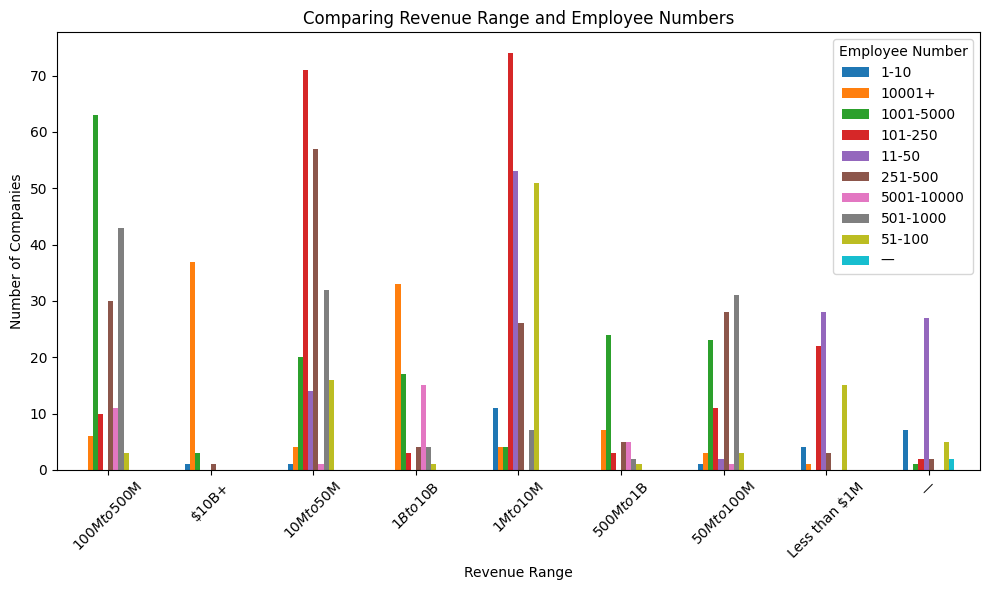

In [686]:
cross_table.plot(kind='bar',  figsize=(10, 6))
# Ajouter des labels et titre
plt.xlabel('Revenue Range')
plt.ylabel('Number of Companies')
plt.title('Comparing Revenue Range and Employee Numbers')
plt.xticks(rotation=45)
plt.legend(title='Employee Number')

# Affichage du graphique
plt.tight_layout()
plt.show()

Il n'y a pas l'air d'avoir de réel corrélation

## Quelle est la répartition des types de financement ?


In [687]:
sheet_1.head(5)

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,Currency,Amount,Year
0,Pipe,Venture - Series Unknown,"$250,000,000",2021-03-31,—,$,2.500000e+08,2021
1,Pipe,Series A,"$50,000,000",2021-03-09,Early Stage Venture,$,5.000000e+07,2021
2,Pipe,Seed,"$6,000,000",2020-02-25,Seed,$,6.000000e+06,2020
3,Pipe,Seed,"$10,000,000",2020-06-24,Seed,$,1.000000e+07,2020
4,Epic Games,Seed,"$1,000,000,000",2021-04-13,Seed,$,1.000000e+09,2021


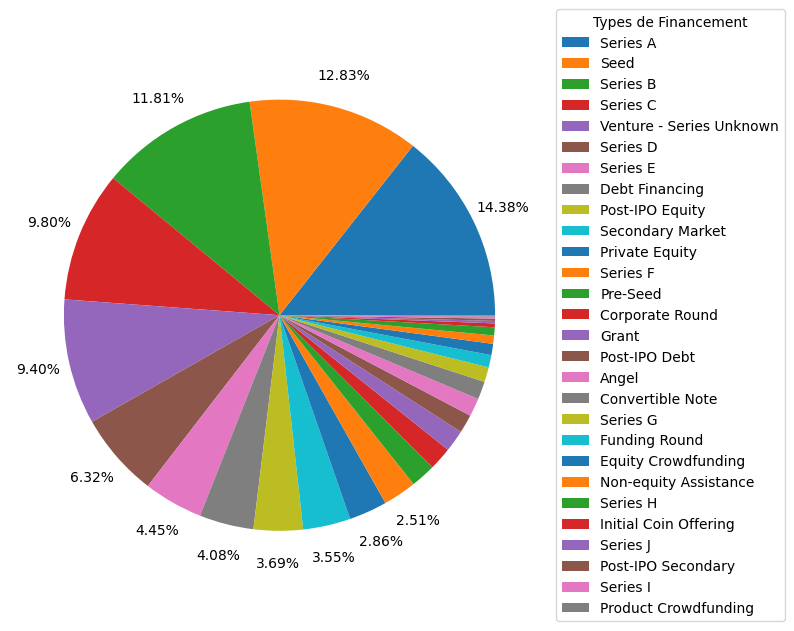

In [688]:
import matplotlib.pyplot as plt

# Définir un seuil pour les pourcentages 
seuil = 2

# Compter les types de financement
Funding = sheet_1.FUNDING_TYPE.value_counts()

# Créer une figure et des axes
fig, ax = plt.subplots(figsize=(10, 7))  # Agrandir la figure

# Fonction pour afficher les pourcentages seulement s'ils sont au-dessus du seuil 
def autopct_function(pct): 
    return ('%.2f%%' % pct) if pct > seuil else ''

# Créer le graphique à secteurs avec les pourcentages à l'extérieur
wedges, texts, autotexts = ax.pie(x=Funding, autopct=autopct_function, pctdistance=1.15)

# Ajouter la légende à droite du graphique
ax.legend(wedges, Funding.index, title="Types de Financement", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Afficher le graphique
plt.show()


Les types de financements sont assez partagées même si Series A, Seed et Series B sont les seuls à dépasser les 10%

## Quel type de financement génère le plus d'argent ?


In [689]:
# Pour ce cas, nous prendrons seulement les dollars car pendant un temps, c'était la devise la plus forte
money = sheet_1[sheet_1['Currency'] == '$']

In [690]:
list_money = money.groupby(by='FUNDING_TYPE')['Amount'].sum()
top_10 = list_money.sort_values(ascending=False).head(10)

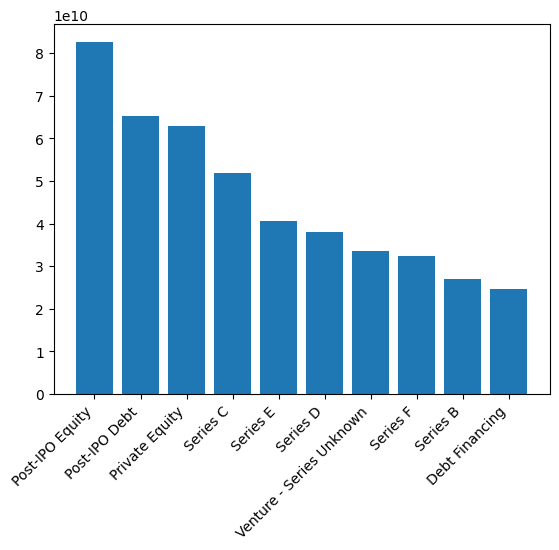

In [691]:
plt.bar(top_10.index, top_10.values)
plt.xticks(rotation=45, ha='right')
plt.show()

On voit donc que le type de financement qui génèrent le plus d'argent est le Post-IPO Equity. Il a soulevé 8*10^10 ce qui revient à 80 milliards.

Post-IPO Equity, c'est quand les firms investissent dans des companies apès qu'elles soient devenue public (c'est à dire appartenant au gouvernement)

## Quelles entreprises ont levé les plus gros financements ?

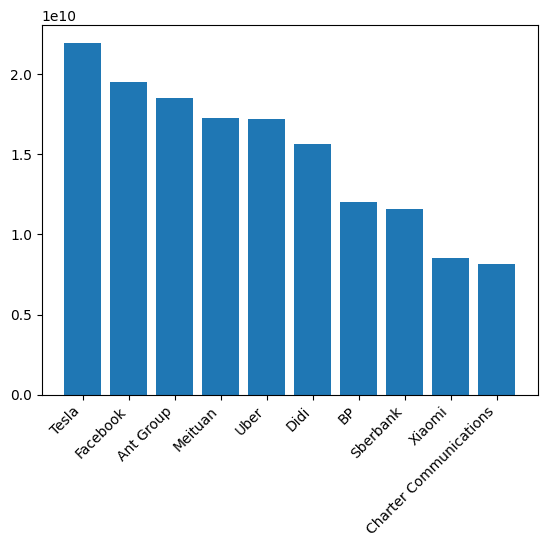

In [ ]:
# On reprend uniquement le dollars
money = sheet_1[sheet_1['Currency'] == '$']
list_money = money.groupby(by='COMPANY_NAME')['Amount'].sum()
top_10 = list_money.sort_values(ascending=False).head(10)
plt.bar(top_10.index, top_10.values)
plt.xticks(rotation=45, ha='right')
plt.show()

L'entreprise ayant soulevé le plus de financement est Telsa suivi par Facebook. c'est logique quand l'on voit les companies que c'est.

## On veut maintenant regarder les montants levés par année 

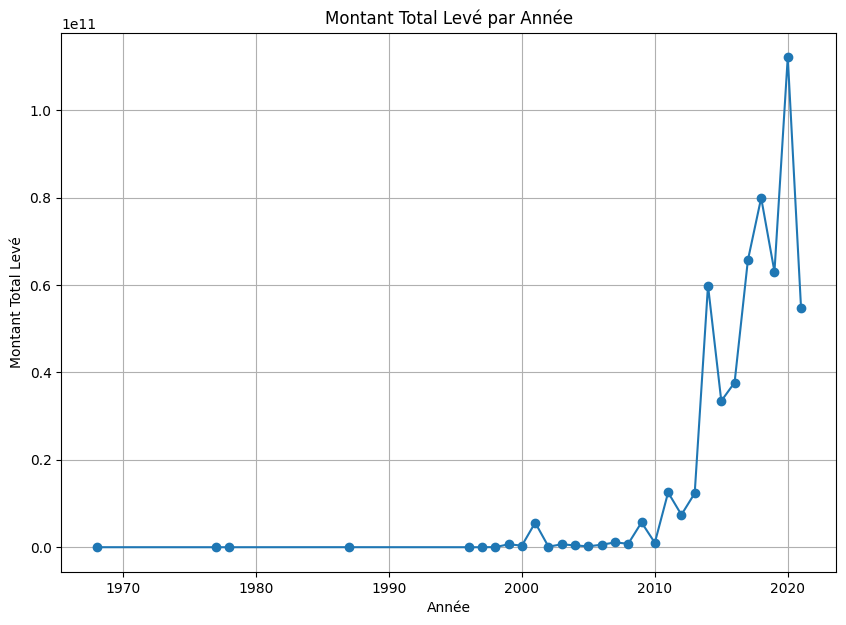

In [694]:
# Filtrer les lignes où la devise est le dollar
money = sheet_1[sheet_1['Currency'] == '$']

# Grouper par année et sommer les montants
total_funding_by_year = money.groupby('Year')['Amount'].sum()

# Créer la série temporelle
plt.figure(figsize=(10, 7))
plt.plot(total_funding_by_year.index, total_funding_by_year.values, marker='o')

# Ajouter les labels et le titre
plt.xlabel('Année')
plt.ylabel('Montant Total Levé')
plt.title('Montant Total Levé par Année')

# Afficher la série temporelle
plt.grid(True)
plt.show()


On voit bien que plus le temps avance, plus les montants sont importants. Il est intéréssant de voir que le pic est atteinds en période covid ce qui est étonnant ! 

## Quelles entreprises ont réalisé le plus d'acquisitions ?

In [695]:
# Compter le nombre d'acquisitions par entreprise
acquisitions_count = sheet_1['COMPANY_NAME'].value_counts()

# Afficher les entreprises avec le plus d'acquisitions
top_acquiring_companies = acquisitions_count.head(10)
print(top_acquiring_companies)


COMPANY_NAME
Tesla            36
SpaceX           35
Uber             27
Ola              25
Lucid            23
Alibaba Group    21
Rover            21
Wave             21
Branch           21
Zomato           21
Name: count, dtype: int64


## Où on surtout étudiés les employés des différentes companies ? 

In [696]:
education_level = sheet_3['ATTENDED_SCHOOLS'].value_counts().sort_values(ascending=False)

# Afficher les résultats
print(education_level)


ATTENDED_SCHOOLS
Stanford University                                                                                                                                                   159
University of California, Berkeley                                                                                                                                    106
Massachusetts Institute of Technology - MIT                                                                                                                            92
Carnegie Mellon University                                                                                                                                             59
Harvard University                                                                                                                                                     57
                                                                                                                                     

On voit que les employés ont étudiés un peu partout même si Stanford University et University of California sont premières